### 1 Load Dataset

In [131]:
import csv
import pandas as pd
import numpy as np

fname = 'Rental Data + Other Datasets MERGED ANALYSIS'

In [132]:
df = pd.read_excel(fname+'.xlsx', parse_dates=['Date'], dayfirst=True)
df = df[df.Region == 'Wellington']
df.head()

,Date,Region,Territorial Authority,Geometric mean rents by region,Geometric mean rents by territorial authority,Synthetic lower quartile rents by region,Synthetic lower quartile rents by territorial authority,Lodged bonds by region,Lodged bonds by territorial authority,Regional GDP,...,Median Weekly Earnings 20-29,Number of Residential Building Consents,Student Enrolments by Region,Approved Student Visa,Approved Work Visa,Average Student Allowance,Average Accommodation,CPI,Mortgage Floating rate,Mortgage 2 year fixed rate
2550,2008-03-01,Wellington,Carterton District,333,197,249,152,1902,13,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2551,2008-03-01,Wellington,Kapiti Coast District,333,284,249,234,1902,131,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2552,2008-03-01,Wellington,Lower Hutt,333,283,249,220,1902,250,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2553,2008-03-01,Wellington,Masterton District,333,213,249,186,1902,33,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2554,2008-03-01,Wellington,Porirua,333,302,249,237,1902,104,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5


### 2 Data Transformation

In [133]:
## Deleting Date of format DateTime as we need int and float objects for regression
import datetime as dt
df['Date']=df['Date'].map(dt.datetime.toordinal)

# Converting categorical values of region and territorial authority to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))
df.head()

,Date,Region,Territorial Authority,Geometric mean rents by region,Geometric mean rents by territorial authority,Synthetic lower quartile rents by region,Synthetic lower quartile rents by territorial authority,Lodged bonds by region,Lodged bonds by territorial authority,Regional GDP,...,Median Weekly Earnings 20-29,Number of Residential Building Consents,Student Enrolments by Region,Approved Student Visa,Approved Work Visa,Average Student Allowance,Average Accommodation,CPI,Mortgage Floating rate,Mortgage 2 year fixed rate
2550,733102,0,0,333,197,249,152,1902,13,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2551,733102,0,1,333,284,249,234,1902,131,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2552,733102,0,2,333,283,249,220,1902,250,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2553,733102,0,3,333,213,249,186,1902,33,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5
2554,733102,0,4,333,302,249,237,1902,104,25074,...,594.5,3273,109010,95355.0,177353.0,5636.0,1140.0,3.4,10.4,9.5


In [134]:
df.drop('Synthetic lower quartile rents by territorial authority',axis=1,inplace=True)
df.drop('Synthetic lower quartile rents by region',axis=1,inplace=True)
df.drop('Geometric mean rents by region',axis=1,inplace=True)
df.drop('Lodged bonds by region',axis=1,inplace=True)


### 3 Model Selection

In [135]:
## Choosing Geometric mean as target as less affected by outliers compared to arithemtic mean 
df['target'] = df['Geometric mean rents by territorial authority']
df.drop('Geometric mean rents by territorial authority',axis=1,inplace=True)

features = df[df.columns.difference(df['target'])]
labels = df['target']
features.drop('target',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [136]:
print(features.shape,labels.shape)

(335, 16) (335,)


### 4 Feature Selection

In [137]:
from feature_selector import FeatureSelector
fs=FeatureSelector(data=features, labels=labels)
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'auc', 
                            n_iterations = 30, 
                             early_stopping = True)

# list of zero importance features
fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until

['Population Estimate 15-39', 'Region', 'Regional GDP']

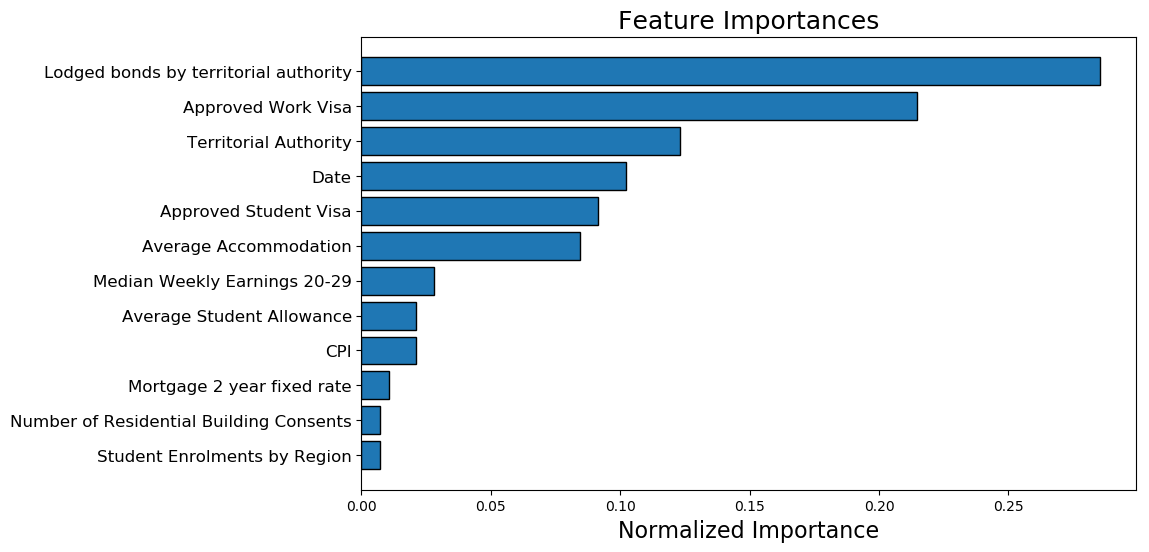

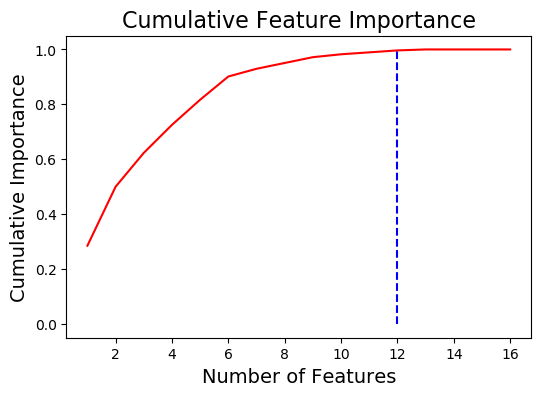

12 features required for 0.99 of cumulative importance


In [138]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [139]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,Lodged bonds by territorial authority,2.700000,0.285211,0.285211
1,Approved Work Visa,2.033333,0.214789,0.500000
2,Territorial Authority,1.166667,0.123239,0.623239
3,Date,0.966667,0.102113,0.725352
4,Approved Student Visa,0.866667,0.091549,0.816901
5,Average Accommodation,0.800000,0.084507,0.901408
6,Median Weekly Earnings 20-29,0.266667,0.028169,0.929577
7,Average Student Allowance,0.200000,0.021127,0.950704
8,CPI,0.200000,0.021127,0.971831
9,Mortgage 2 year fixed rate,0.100000,0.010563,0.982394


In [140]:
features = fs.remove(methods='all',keep_one_hot=False)

['zero_importance'] methods have been run

Removed 3 features including one-hot features.


In [141]:
features.head()

,Approved Student Visa,Approved Work Visa,Average Accommodation,Average Student Allowance,CPI,Date,Lodged bonds by territorial authority,Median Weekly Earnings 20-29,Mortgage 2 year fixed rate,Mortgage Floating rate,Number of Residential Building Consents,Student Enrolments by Region,Territorial Authority
2550,95355.0,177353.0,1140.0,5636.0,3.4,733102,13,594.5,9.5,10.4,3273,109010,0
2551,95355.0,177353.0,1140.0,5636.0,3.4,733102,131,594.5,9.5,10.4,3273,109010,1
2552,95355.0,177353.0,1140.0,5636.0,3.4,733102,250,594.5,9.5,10.4,3273,109010,2
2553,95355.0,177353.0,1140.0,5636.0,3.4,733102,33,594.5,9.5,10.4,3273,109010,3
2554,95355.0,177353.0,1140.0,5636.0,3.4,733102,104,594.5,9.5,10.4,3273,109010,4


## 4. Changing data for prediction

### 4.1 Increasing no. of lodged bonds after 2017

In [142]:
def update_lb(x):
    x = x+100
    return int(x)

df['Date']=df['Date'].map(dt.datetime.fromordinal)
df_2017 = df[df['Date'].dt.year >= 2017]
df_2017['Lodged bonds by territorial authority']=df_2017['Lodged bonds by territorial authority'].apply(update_lb)
df[df['Date'].dt.year >= 2017] = df_2017 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 4.2 Increasing residential building consents

In [143]:
def update_rbc(x):
    x = x+100
    return int(x)

# df['Date']=df['Date'].map(dt.datetime.fromordinal)
# df_2017 = df[df['Date'].dt.year >= 2017]
# df_2017['Number of Residential Building Consents']=df_2017['Number of Residential Building Consents'].apply(update_rbc)
# df[df['Date'].dt.year >= 2017] = df_2017 


### 4.3 Decreasing approved student visas

In [144]:
def update_visa(x):
    x = x-1000
    return int(x)

# df['Date']=df['Date'].map(dt.datetime.fromordinal)
# df_2017 = df[df['Date'].dt.year >= 2017]
# df_2017['Approved Student Visa']=df_2017['Approved Student Visa'].apply(update_visa)
# df[df['Date'].dt.year >= 2017] = df_2017 

### 4.2 Decreasing student enrolment numbers

In [145]:
def update_stdnum(x):
    x = x-1000
    return int(x)

# df['Date']=df['Date'].map(dt.datetime.fromordinal)
# df_2017 = df[df['Date'].dt.year >= 2017]
# df_2017['Student Enrolments by Region']=df_2017['Student Enrolments by Region'].apply(update_stdnum)
# df[df['Date'].dt.year >= 2017] = df_2017 


### 4.3 Decreasing median weekly earning wage

In [146]:
def update_wage(x):
    x = x-100
    return int(x)

# df['Date']=df['Date'].map(dt.datetime.fromordinal)
# df_2017 = df[df['Date'].dt.year >= 2017]
# df_2017['Median Weekly Earnings 20-29']=df_2017['Median Weekly Earnings 20-29'].apply(update_wage)
# df[df['Date'].dt.year >= 2017] = df_2017 

## 5. Modelling

In [147]:
from sklearn.cross_validation import train_test_split
from datetime import datetime

final_vars = list(features) + ['target']
df1 = df[final_vars]
df1.head()

# df['Date']=df['Date'].map(dt.datetime.fromordinal)
# train, test = train_test_split(df1, test_size = 0.4)
train = df[df['Date'].dt.year <= 2017]
test = df[df['Date'].dt.year > 2017]

train['Date']=train['Date'].map(dt.datetime.toordinal)
test['Date']=test['Date'].map(dt.datetime.toordinal)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train  = train[list(features)]
y_train  = train['target']
X_test = test[list(features)]
y_test  = test['target']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 5.1 Gradient Boosting - Hyperparameter Tuning  

In [148]:
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingRegressor()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, y_train)

print(gf_tune.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 705 out of 720 | elapsed:   12.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.0s finished


{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 391}


#### 5.2 Model

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
import time
start_time = time.time()

model = GradientBoostingRegressor(**gf_tune.best_params_)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))
print('Gradient Boosting RMSE: %.4f' % model_rmse)


Gradient Boosting R squared: 0.5299
Gradient Boosting RMSE: 38.6879


#### 5.3 Evaluating Feature Importance

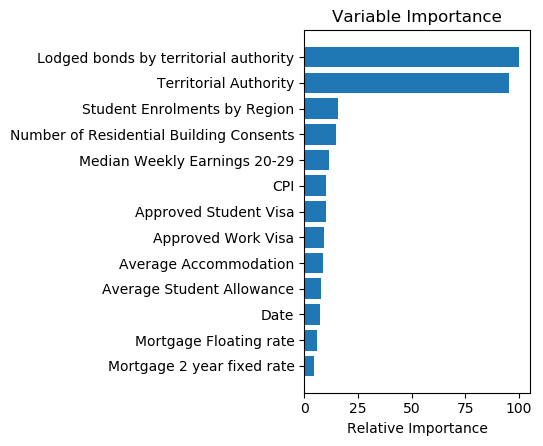

Lodged bonds by territorial authority-100.00%
Territorial Authority-95.56%
Student Enrolments by Region-15.58%
Number of Residential Building Consents-14.72%
Median Weekly Earnings 20-29-11.63%
CPI-10.26%
Approved Student Visa-10.15%
Approved Work Visa-9.03%
Average Accommodation-8.77%
Average Student Allowance-7.64%
Date-7.52%
Mortgage Floating rate-6.06%
Mortgage 2 year fixed rate-4.76%
--- 0.22771644592285156 seconds ---


In [150]:
feature_labels = list(features)
feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.asarray(feature_labels)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

feature_indexes_by_importance = feature_importance.argsort()
for index in reversed(feature_indexes_by_importance):
    print('{}-{:.2f}%'.format(feature_labels[index], (feature_importance[index])))
    
print("--- %s seconds ---" % (time.time() - start_time))

In [151]:
dates = df[df['Date'].dt.year > 2017]
dates = dates['Date']
dates = dates.reset_index(drop=True)

y_pred = pd.Series(y_pred.tolist())
pred_data = pd.concat([dates, y_pred], axis=1)
pred_data.to_csv('PREDICTION/pred_data.csv')

#### 5.4 Learning Curve

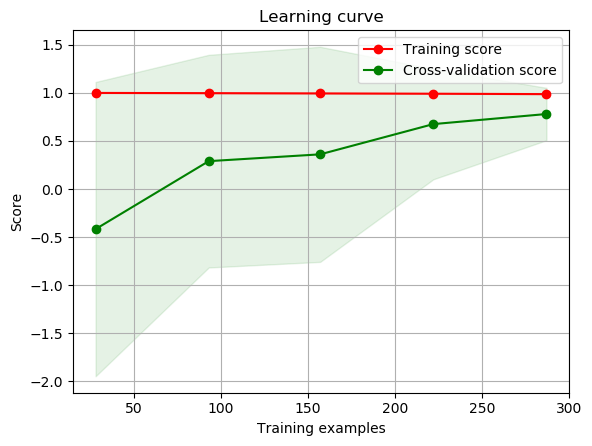

In [152]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
        
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model, "Learning curve", X_train, y_train, cv=10, n_jobs=3) 
plt.show()